### Imports and Utility-Functions

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%run ./library/traffic_simulation.py
%run ../utils/helper.py
# %run /workspaces/jupyterlite/content/pytroch/arrays_and_matricies.py
# %run /workspaces/jupyterlite/content/algorithms/pytorch-traffic-simulation.py

In [2]:
def draw_lines_based_on_points_on_plot(points, ax=None, line_color='blue', line_size=0.5):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(points[:, 0], points[:, 1], color=line_color, linewidth=line_size)

    return ax

def draw_points_on_plot(point_sequence, ax, line_color, point_size=1):
    x, y = zip(*point_sequence)
    ax.scatter(x, y, color=line_color, s=point_size)
    return ax

In [3]:
def visualize_line_change_by_theta(line, theta):
    new_endpoint = calculate_rotated_line(line[0], line[1], theta)
    new_line = [line[1], new_endpoint]
    
    plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], 'r-', label='Original Line')

    # Plot the new line
    plt.plot([new_line[0][0], new_line[1][0]], [new_line[0][1], new_line[1][1]], 'b-', label='New Line')
    
    # Plotting points for clarity
    plt.scatter(*line[0], color='red', zorder=5)
    plt.scatter(*line[1], color='red', zorder=5)
    plt.scatter(*new_line[0], color='blue', zorder=5)
    plt.scatter(*new_line[1], color='blue', zorder=5)
    
    # Labeling the points
    plt.text(line[0][0], line[0][1], 'A', fontsize=12, ha='right')
    plt.text(line[1][0], line[1][1], 'B', fontsize=12, ha='right')
    plt.text(new_line[1][0], new_line[1][1], "B'", fontsize=12, ha='right')
    
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.legend()
    plt.title('Visualizing Line Transformation')
    plt.show()


In [4]:
# a bit dirty. A good way to redraw
def redraw_initial_sketch():
    fig, ax = plt.subplots()
    ax.set_xlim(-30, 80)
    ax.set_ylim(-20, 70)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    
    angle_count_tuples = [[0, 60], [10, 9], [0, 20], [10, 9], [0, 60], [10, 9], [0, 20], [10, 9]]
    rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
    init_point_sequence = [[0, 5], [1, 5]]
    point_sequence_one = generate_point_sequence(init_point_sequence, rotation_angles)
    ax = draw_lines_based_on_points_on_plot(point_sequence_one, ax, line_color='blue')
    
    angle_count_tuples = [[0, 60], [6, 15], [0, 20], [6, 15], [0, 60], [6, 15], [0, 20], [6, 15]]
    rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
    init_point_sequence = [[-0.5, 1], [0.5, 1]]
    point_sequence_two = generate_point_sequence(init_point_sequence, rotation_angles)
    ax = draw_lines_based_on_points_on_plot(point_sequence_two, ax, line_color='red')

    return fig, ax

### Theory


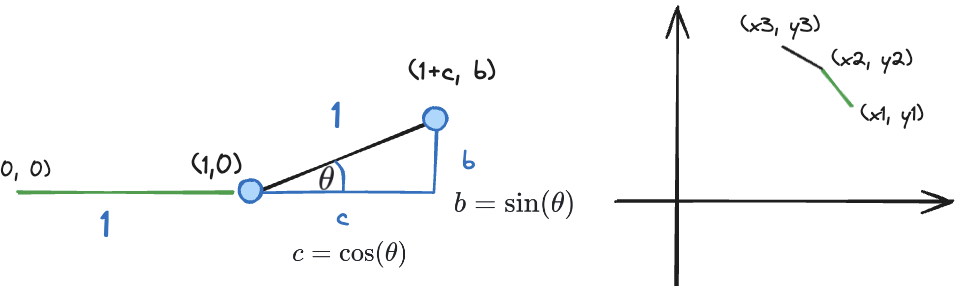
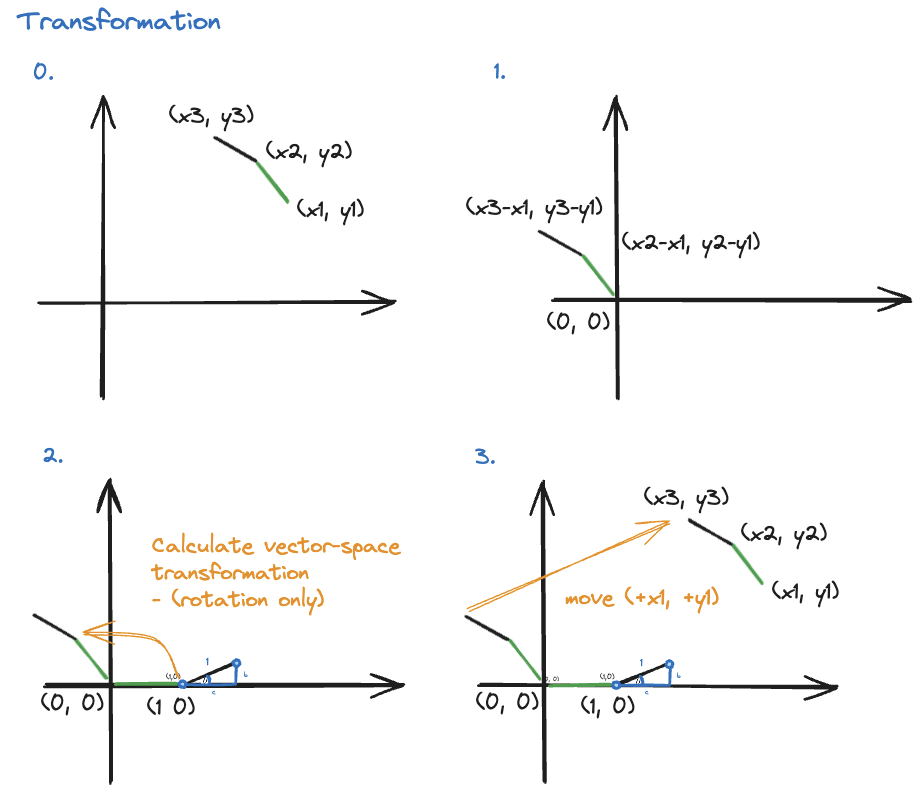

In [5]:
html(calculate_rotated_line)

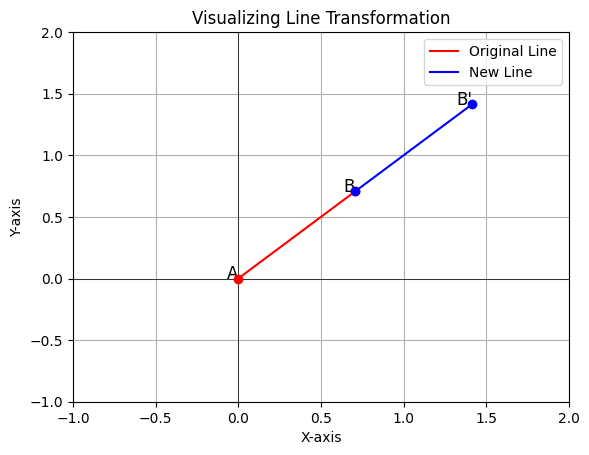

In [6]:
line = [[0, 0], [0.7071, 0.7071]]
theta = np.radians(0)
visualize_line_change_by_theta(line, theta)

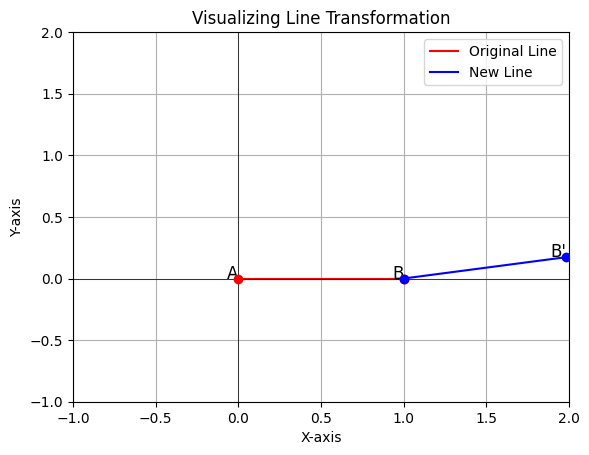

In [7]:
line = [[0, 0], [1, 0]]
theta = np.radians(10)
visualize_line_change_by_theta(line, theta)

### Streets-Building

In [8]:
def calc_roation_angles_from_tuple(angle_count_tuples):
    return np.radians(np.repeat([angle for angle, count in angle_count_tuples], [count for angle, count in angle_count_tuples]))

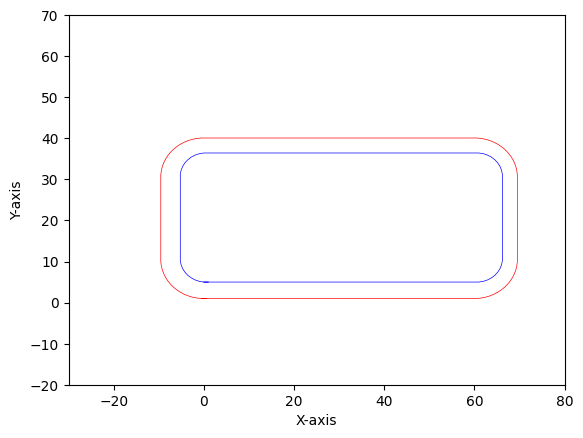

In [9]:
fig, ax = plt.subplots()
ax.set_xlim(-30, 80)
ax.set_ylim(-20, 70)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

angle_count_tuples = [[0, 60], [10, 9], [0, 20], [10, 9], [0, 60], [10, 9], [0, 20], [10, 9]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[0, 5], [1, 5]]
point_sequence_one = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence_one, ax, line_color='blue')

angle_count_tuples = [[0, 60], [6, 15], [0, 20], [6, 15], [0, 60], [6, 15], [0, 20], [6, 15]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[-0.5, 1], [0.5, 1]]
point_sequence_two = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence_two, ax, line_color='red')

plt.show()

### Car-Simulation

In [10]:
scatter_one = ax.scatter([], [], c='green', s=10)
scatter_two = ax.scatter([], [], c='orange', s=10)
time_scale = 5

def update(i):
    global ax, scatter_one, scatter_two, time_scale, point_sequence_one, point_sequence_two
    
    points_indices_one = np.mod(time_scale * np.array([2*i, i+20, i+50]), point_sequence_one.shape[0])
    points_indices_two = np.mod(time_scale * np.array([i+5, i+30, i+50]), point_sequence_two.shape[0])
    
    points_one = np.array([point_sequence_one[index] for index in points_indices_one])
    points_two = np.array([point_sequence_two[index] for index in points_indices_two])
    
    scatter_one.set_offsets(points_one)
    scatter_two.set_offsets(points_two)
    
    return scatter_one, scatter_two

ani = FuncAnimation(fig, update, frames=range(200), repeat=True, blit=True)
plt.close(fig)
HTML(ani.to_html5_video())

In [11]:
N = 1000000
time_scale = 1
indices = np.arange(N)

indices_1 = np.mod(time_scale * np.array([2*indices, indices+20, indices+50]), point_sequence_one.shape[0])
indices_2 = np.mod(time_scale * np.array([indices+5, indices+30, indices+50]), point_sequence_two.shape[0])

points_one = point_sequence_one[indices_1]
points_two = point_sequence_two[indices_2]

#### Torch-Operations

In [12]:
# import torch

# def fill_zero_places(a):
#     a = torch.cat([torch.tensor([-1], device=a.device), a])
#     nonzero_indices = torch.nonzero(a).squeeze()
#     diff = torch.diff(torch.cat([nonzero_indices, torch.tensor([a.shape[0]], device=a.device)]))
#     b = a[nonzero_indices].repeat_interleave(diff)
#     b[b < 0] = 0
#     c = b[1:]
    
#     return c

# def shift_values_to_next_available_zero(a):
#     b = (a > 0).int()
#     b = torch.cat([torch.tensor([1], device=a.device), b])
#     c = torch.arange(b.shape[0], device=a.device) * b
#     d = c[1:]
#     e = torch.roll(fill_zero_places(d), 1)
#     e[0] = 0
#     f = torch.zeros_like(a)
#     f.scatter_add_(0, e.long(), a)

#     return f

# def fill_zero_values_ascending_rest_with_zero(a):
#     b = (a > 0).int()
#     cumsum = torch.cumsum(1 - b, dim=0)
#     c = (cumsum * (1 - b) - torch.maximum(b * cumsum, torch.zeros_like(cumsum)).cummax(dim=0)[0]) * (1 - b)
    
#     return c

# def find_one_zero_pattern(a):
#     b = torch.roll(a.int(), -1)
#     b[-1] = 1
#     c = a - b
#     d = (c == 1).int()
    
#     return d

# def fill_zero_values_descending_rest_with_zero(a):
#     b = fill_zero_values_ascending_rest_with_zero(a)
#     c = (b > 0).int()
#     d = find_one_zero_pattern(c)
#     e = d * b
#     f = shift_values_to_next_available_zero(e)
#     g = fill_zero_places(f)
#     h = ((g + 1) - b) * c
    
#     return h

# def find_values_that_must_be_reordered(a):
#     b = torch.arange(1, a.shape[0] + 1)
#     c = a - b
#     d, _ = torch.cummin(c.flip(0), dim=0)
#     d = d.flip(0)
#     e = (c == d).int()

#     return 1 - e

# def adjust_cars_no_lane_change(a):
#     b = 1 - find_values_that_must_be_reordered(a)
#     c = fill_zero_values_descending_rest_with_zero(b)
#     d = a * b
#     e = shift_values_to_next_available_zero(d)
#     f = fill_zero_places(e)
#     g = f - c

#     return g

#### Add cars to lanes, Respect other cars, Change lane

In [13]:
# def index_order_for_cars_in_lanes(car_specifications, lanes):
#     lane_indices = np.array([car_specifications[car_specifications[:, 1] == i, 2].astype(int) for i in lanes])
#     car_indicies = np.array([car_specifications[car_specifications[:, 1] == i, 0].astype(int) for i in lanes])
   
#     return np.take_along_axis(car_indicies, np.argsort(lane_indices), axis=1)

In [14]:
# def update_lane_indicies(car_specifications, lane_num_tracks):
#     car_specifications[:, 2] = np.mod(car_specifications[:, 3] + car_specifications[:, 2], lane_num_tracks[car_specifications[:, 1].astype(int)])
    
#     return car_specifications

In [15]:
# def update_lane_indicies_with_overtake(car_specifications, lane_num_tracks, lanes):
#     index_order = index_order_for_cars_in_lanes(car_specifications, lanes)
#     car_specifications[:, 2] = np.mod(car_specifications[:, 3] + car_specifications[:, 2], lane_num_tracks[car_specifications[:, 1].astype(int)])
#     updated_index_order = index_order_for_cars_in_lanes(car_specifications, lanes)

    
#     # on collison, do not overtake
    
#     return car_specifications

#### Code

In [16]:
import torch

def fill_zero_places(a):
    """
    a = tensor([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
    b = tensor([-1,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0, 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0])
    nonzero_indices = tensor([ 0,  1,  6,  8, 14, 23])
    diff = tensor([1, 5, 2, 6, 9, 8])
    c = tensor([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
    d = tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
    """
    b = torch.cat([torch.tensor([-1], device=a.device), a])
    nonzero_indices = torch.nonzero(b).squeeze()
    diff = torch.diff(torch.cat([nonzero_indices, torch.tensor([b.shape[0]], device=b.device)]))
    c = b[nonzero_indices].repeat_interleave(diff)
    c[c < 0] = 0
    d = c[1:]
    
    return d

def shift_values_to_next_available_zero(a):
    """
    a = tensor([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
    b = tensor([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
    c = tensor([ 0,  1,  0,  0,  0,  0,  6,  0,  8,  0,  0,  0,  0,  0, 14,  0,  0,  0, 0,  0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0])
    d = tensor([ 1,  0,  0,  0,  0,  6,  0,  8,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0, 0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0])
    e = tensor([ 0,  1,  1,  1,  1,  1,  6,  6,  8,  8,  8,  8,  8,  8, 14, 14, 14, 14, 14, 14, 14, 14, 14, 23, 23, 23, 23, 23, 23, 23])
    f = tensor([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    """
    b = (a > 0).int()
    b = torch.cat([torch.tensor([1], device=a.device), b])
    c = torch.arange(b.shape[0], device=a.device) * b
    d = c[1:]
    e = torch.roll(fill_zero_places(d), 1)
    e[0] = 0
    f = torch.zeros_like(a)
    f.scatter_add_(0, e.long(), a)
        
    return f

def fill_zero_values_ascending_rest_with_zero(a):
    """
    a = tensor([4, 3, 2, 1, 0, 1, 0, 5, 4, 3, 2, 1, 0, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 0, 4, 3, 2, 1, 0, 0])
    b = tensor([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0], dtype=torch.int32)
    c = tensor([0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 5, 6, 7])
    d = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2])
    """
    b = (a > 0).int()
    c = torch.cumsum(1 - b, dim=0)
    d = (c * (1 - b) - torch.maximum(b * c, torch.zeros_like(c)).cummax(dim=0)[0]) * (1 - b)
    
    return d

def find_one_zero_pattern(a):
    """
    a = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=torch.int32)
    b = tensor([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=torch.int32)
    c = tensor([ 0,  0,  0, -1,  1, -1,  1,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0, 0,  0, -1,  1, -1,  1,  0,  0,  0,  0,  0, -1], dtype=torch.int32)
    d = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=torch.int32)
    """
    b = torch.roll(a.int(), -1)
    b[-1] = 1
    c = a - b
    d = (c == 1).int()
    
    return d

def fill_zero_values_descending_rest_with_zero(a):
    b = fill_zero_values_ascending_rest_with_zero(a)
    c = (b > 0).int()
    d = find_one_zero_pattern(c)
    e = d * b
    f = shift_values_to_next_available_zero(e)
    g = fill_zero_places(f)
    h = ((g + 1) - b) * c
    
    return h

def fill_zero_values_descending_rest_with_zero(a):
    """
    a = tensor([4, 3, 2, 1, 0, 1, 0, 5, 4, 3, 2, 1, 0, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 0, 4, 3, 2, 1, 0, 0])
    b = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2])
    c = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], dtype=torch.int32)
    d = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=torch.int32)
    e = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])
    f = tensor([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
    g = tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
    h = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])
    """
    b = fill_zero_values_ascending_rest_with_zero(a)
    c = (b > 0).int()
    d = find_one_zero_pattern(c)
    e = d * b
    f = shift_values_to_next_available_zero(e)
    g = fill_zero_places(f)
    h = ((g + 1) - b) * c
    
    return h

def find_values_that_must_be_reordered(a):
    """
    a = tensor([ 3, 10,  8, 11,  5, 13,  7, 14, 18, 15, 19, 20, 13, 21, 16, 24, 19, 24, 23, 22, 28, 22, 27, 26, 33, 32, 30, 32, 31, 36])
    b = tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
    c = tensor([2, 8, 5, 7, 0, 7, 0, 6, 9, 5, 8, 8, 0, 7, 1, 8, 2, 6, 4, 2, 7, 0, 4, 2, 8, 6, 3, 4, 2, 6])
    d = tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 6])
    e = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], dtype=torch.int32)
    f = tensor([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0], dtype=torch.int32)
    """
    b = torch.arange(1, a.shape[0] + 1)
    c = a - b
    d, _ = torch.cummin(c.flip(0), dim=0)
    d = d.flip(0)
    e = (c == d).int()
    f = 1 - e

    return f

def adjust_cars_no_lane_change(a):
    """
    a = tensor([ 3, 10,  8, 11,  5, 13,  7, 14, 18, 15, 19, 20, 13, 21, 16, 24, 19, 24, 23, 22, 28, 22, 27, 26, 33, 32, 30, 32, 31, 36, -1, -1])
    b = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=torch.int32)
    c = tensor([4, 3, 2, 1, 0, 1, 0, 5, 4, 3, 2, 1, 0, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 0, 4, 3, 2, 1, 0, 0, 1, 0])
    d = tensor([ 0,  0,  0,  0,  5,  0,  7,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0, 0,  0,  0, 22,  0, 26,  0,  0,  0,  0, 31, 36, 0, -1])
    e = tensor([ 5,  0,  0,  0,  0,  7,  0, 13,  0,  0,  0,  0,  0, 22,  0,  0,  0,  0, 0,  0,  0,  0, 26,  0, 31,  0,  0,  0,  0, 36, -1, 0])
    f = tensor([ 5,  5,  5,  5,  5,  7,  7, 13, 13, 13, 13, 13, 13, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 26, 31, 31, 31, 31, 31, 36, 0, 0])
    g = tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 36])
    """

    b = 1 - find_values_that_must_be_reordered(a)
    # Extend a and b with dummy-values to cover the cases where no car has to be reordered without throwing an error
    a = torch.cat([a, torch.tensor([-1, -1])])
    b = torch.cat([b, torch.tensor([0, 1])])
    c = fill_zero_values_descending_rest_with_zero(b)
    d = a * b
    e = shift_values_to_next_available_zero(d)
    f = fill_zero_places(e)
    g = f[:-2] - c[:-2]

    return g

def eligible_for_takeover(a, val_idx=1):
    """
    - two lane case
    - all cars with their original indicies (no adjustment to put them in one lane)
    - those cars where the index occurs twice cannot change the lane

    a = torch.tensor([[0, 1, 4], [0, 2, 3], [0, 3, 5], [1, 2, 3], [1, 3, 7], [0, 4, 3], [1, 10, 1], [1, 11, 3], [0, 9, 5], [0, 10, 3]], dtype=torch.float)
    b = tensor([0, 1, 0, 1, 0, 0, 0, 1, 0, 0], dtype=torch.int32)
    c = tensor([0, 1, 1, 1, 1, 0, 0, 1, 1, 0], dtype=torch.int32)
    d = tensor([0, 1, 1, 0, 1, 1, 1, 0, 1, 0], dtype=torch.int32)
    e = tensor([1, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=torch.int32)
    """

    sorted_matrix = sort_matrix_by_nth_entry(a, val_idx)
    b = (sorted_matrix[:, val_idx] - torch.cat([sorted_matrix[1:, val_idx], torch.tensor([sorted_matrix[-2, val_idx]])]) == 0).int()
    c = torch.roll(b, 1) | b
    d = reverse_sort_matrix_by_nth_entry(a, c)
    e = 1 - d
    
    return e

def mapping_max_values_to_prev_lanes(cars):
    """
    - two lanes
    """
    max_values_per_lane = maximum_value_by_grp(cars, 0, 1)
    mapping_max_values_per_lane = torch.clone(max_values_per_lane)
    mapping_max_values_per_lane[1:, 1] = mapping_max_values_per_lane[:-1, 1]
    mapping_max_values_per_lane[0, 1] = 0

    return mapping_max_values_per_lane

def cars_desiring_takeover(cars, grp_idx = 0, val_idx = 1, speed_idx = 2):
    """
    - two lane case
    - all cars with their original indicies (no adjustment to put them in one lane)

    returns:
     - original_cars_to_overtake: positions of cars (in their original index) which try to overtake
    """

    # before the updates, no car is eligible for takeover (all cars are already in order)
    mapping_max_values_per_lane = mapping_max_values_to_prev_lanes(cars)
    cars_in_single_lane = add_to_matrix_mapping_values(cars, mapping_max_values_per_lane)
    
    # Update the cars
    cars_update = torch.clone(cars_in_single_lane)
    cars_update[:, val_idx] += cars_update[:, speed_idx]
    
    # Adjust the cars, such that they could fit into one lane (to execute adjust_cars_no_lane_change)
    cars_update_ordered_by_grp = sort_matrix_by_nth_entry(cars_update)

    # Based on the cars in their respective groups, which are the ones that try to overtake?
    updated_cars_to_overtake = find_values_that_must_be_reordered(cars_update_ordered_by_grp[:, 1])
    original_cars_to_overtake = reverse_sort_matrix_by_nth_entry(cars_update, updated_cars_to_overtake)

    return original_cars_to_overtake

def cars_that_overtake(cars):
    cars_that_might_overtake = cars_desiring_takeover(cars) & eligible_for_takeover(cars)
    prob_that_cars_overtake = cars_that_might_overtake * cars[:, 3]
    cars_that_overtake = (prob_that_cars_overtake > torch.rand(prob_that_cars_overtake.shape[0]))

    return cars_that_overtake

#### Speed-Up

In [17]:
# Ferature: Should also work with an eliptic track:
# - trick: put the last car ahead of the top car by one round
def update_cars(cars, track_sizes):
    """
    - two car lanes
    """
    
    cars_that_change_lane = cars_that_overtake(cars)
    cars[:, 0] += cars_that_change_lane
    cars[:, 0] = torch.remainder(cars[:, 0], 2)

    # Sort cars (which might have updated
    cars_sorted = sort_matrix_by_nth_and_mth_column(cars)
    
    # Put all cars in one lane
    max_values_per_lane = mapping_max_values_to_prev_lanes(cars_sorted)
    cars_in_single_lane = add_to_matrix_mapping_values(cars_sorted, max_values_per_lane)

    # Update the cars
    cars_update = torch.clone(cars_in_single_lane)
    cars_update[:, 1] += cars_update[:, 2]

    # Adjust the cars, such that they could fit into one lane (to execute adjust_cars_no_lane_change)
    cars_update_in_lane = torch.clone(cars_update)
    cars_update_in_lane[:, 1] = adjust_cars_no_lane_change(cars_update[:, 1])[:]

    # Remove the lane offset and put the cars to the original index
    neg_max_values_per_lane = torch.clone(max_values_per_lane)
    neg_max_values_per_lane[:, 1] = - neg_max_values_per_lane[:, 1]
    cars_update_multi_lane = add_to_matrix_mapping_values(cars_update_in_lane, neg_max_values_per_lane)

    return cars_update_multi_lane

In [44]:
track_sizes = torch.tensor([[0, point_sequence_one.shape[0]], [1, point_sequence_two.shape[0]]])
track_sizes

tensor([[  0, 198],
        [  1, 222]])

In [ ]:
track_sizes = torch.tensor([[0, point_sequence_one.shape[0]], [1, point_sequence_two.shape[0]])

# Ferature: Should also work with an eliptic track:
# - trick: put the last car ahead of the top car by one round
def update_cars(cars, track_sizes):
    """
    - two car lanes
    """
    
    cars_that_change_lane = cars_that_overtake(cars)
    cars[:, 0] += cars_that_change_lane
    cars[:, 0] = torch.remainder(cars[:, 0], 2)

    # Sort cars (which might have updated
    cars_sorted = sort_matrix_by_nth_and_mth_column(cars)
    
    # Put all cars in one lane
    max_values_per_lane = mapping_max_values_to_prev_lanes(cars_sorted)
    cars_in_single_lane = add_to_matrix_mapping_values(cars_sorted, max_values_per_lane)

    # Update the cars
    cars_update = torch.clone(cars_in_single_lane)
    cars_update[:, 1] += cars_update[:, 2]

    # Adjust the cars, such that they could fit into one lane (to execute adjust_cars_no_lane_change)
    cars_update_in_lane = torch.clone(cars_update)
    cars_update_in_lane[:, 1] = adjust_cars_no_lane_change(cars_update[:, 1])[:]

    # Remove the lane offset and put the cars to the original index
    neg_max_values_per_lane = torch.clone(max_values_per_lane)
    neg_max_values_per_lane[:, 1] = - neg_max_values_per_lane[:, 1]
    cars_update_multi_lane = add_to_matrix_mapping_values(cars_update_in_lane, neg_max_values_per_lane)

    return cars_update_multi_lane

In [18]:
lane_num_tracks = torch.tensor([0, 1])
cars_position = torch.arange(0, 30)
cars_speed = torch.randint(0, 10, (30,))
chance_for_takeover = torch.rand(30) / 4

lane_num_tracks, cars_position, cars_speed, cars_position + cars_speed, chance_for_takeover

(tensor([0, 1]),
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 tensor([1, 3, 1, 8, 7, 6, 2, 9, 1, 4, 2, 5, 4, 2, 7, 3, 9, 4, 1, 4, 0, 5, 9, 2,
         2, 8, 0, 6, 2, 8]),
 tensor([ 1,  4,  3, 11, 11, 11,  8, 16,  9, 13, 12, 16, 16, 15, 21, 18, 25, 21,
         19, 23, 20, 26, 31, 25, 26, 33, 26, 33, 30, 37]),
 tensor([0.1401, 0.2152, 0.1397, 0.0798, 0.1018, 0.1612, 0.2044, 0.1380, 0.0589,
         0.1154, 0.1140, 0.1304, 0.1473, 0.1346, 0.1805, 0.2450, 0.0778, 0.0351,
         0.1054, 0.0203, 0.0028, 0.1508, 0.0966, 0.1145, 0.1197, 0.2083, 0.1845,
         0.1879, 0.2097, 0.1757]))

In [19]:
# lane-id, lane-idx, speed, prob.-lane-change, unique-id
cars = torch.tensor([[0, 1, 4, 0.1, 1], [0, 2, 3, 0.1, 2], [0, 3, 5, 0.1, 3], [1, 2, 3, 0.1, 4], [1, 3, 7, 0.1, 5], [0, 4, 3, 0.1, 6], [1, 10, 1, 0.1, 7], [1, 11, 3, 0.1, 8], [0, 9, 5, 0.1, 9], [0, 10, 3, 0.1, 10]], dtype=torch.float)
cars = sort_matrix_by_nth_and_mth_column(cars)
cars = update_cars(cars)

cars

tensor([[ 0.0000,  4.0000,  4.0000,  0.1000,  1.0000],
        [ 0.0000,  5.0000,  3.0000,  0.1000,  2.0000],
        [ 0.0000,  7.0000,  3.0000,  0.1000,  6.0000],
        [ 0.0000, 12.0000,  5.0000,  0.1000,  9.0000],
        [ 0.0000, 13.0000,  3.0000,  0.1000, 10.0000],
        [ 1.0000,  8.0000,  5.0000,  0.1000,  3.0000],
        [ 1.0000, 15.0000,  3.0000,  0.1000,  4.0000],
        [ 1.0000, 20.0000,  7.0000,  0.1000,  5.0000],
        [ 1.0000, 21.0000,  1.0000,  0.1000,  7.0000],
        [ 1.0000, 24.0000,  3.0000,  0.1000,  8.0000]])

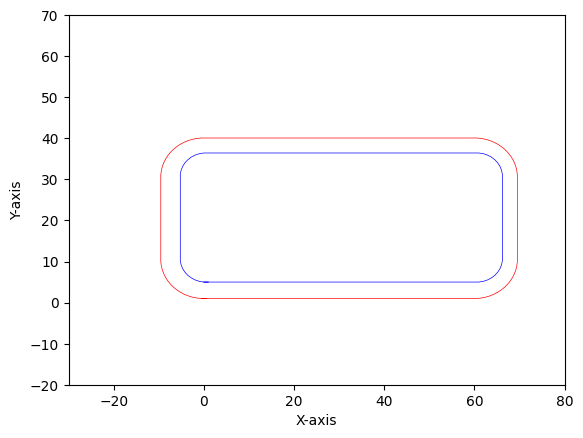

In [20]:
fig, ax = plt.subplots()
ax.set_xlim(-30, 80)
ax.set_ylim(-20, 70)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

angle_count_tuples = [[0, 60], [10, 9], [0, 20], [10, 9], [0, 60], [10, 9], [0, 20], [10, 9]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[0, 5], [1, 5]]
point_sequence_one = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence_one, ax, line_color='blue')

angle_count_tuples = [[0, 60], [6, 15], [0, 20], [6, 15], [0, 60], [6, 15], [0, 20], [6, 15]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[-0.5, 1], [0.5, 1]]
point_sequence_two = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence_two, ax, line_color='red')

plt.show()

In [38]:
# lane-id, lane-idx, speed, prob.-lane-change, unique-id
cars = torch.tensor([[0, 1, 4, 0.1, 1], [0, 2, 3, 0.1, 2], [0, 3, 5, 0.1, 3], [1, 2, 3, 0.1, 4], [1, 3, 7, 0.1, 5], [0, 4, 3, 0.1, 6], [1, 10, 1, 0.1, 7], [1, 11, 3, 0.1, 8], [0, 9, 5, 0.1, 9], [0, 10, 3, 0.1, 10]], dtype=torch.float)
cars = sort_matrix_by_nth_and_mth_column(cars)

points_indices_one_list = []
points_indices_two_list = []

# visualize updates
for _ in range(1000):
    cars = update_cars(cars)
    cars_on_lane_one = cars[cars[:, 0] == 0]
    cars_on_lane_two = cars[cars[:, 0] == 1]

    points_indices_one_list.append(torch.remainder(cars_on_lane_one[:, 1], point_sequence_one.shape[0]))
    points_indices_two_list.append(torch.remainder(cars_on_lane_two[:, 1], point_sequence_two.shape[0]))

In [41]:
scatter_one = ax.scatter([], [], c='green', s=10)
scatter_two = ax.scatter([], [], c='orange', s=10)
time_scale = 5

def update(i):
    global ax, scatter_one, scatter_two, time_scale, point_sequence_one, point_sequence_two
    
    points_indices_one = points_indices_one_list[i]
    points_indices_two = points_indices_two_list[i]
    
    points_one = np.array([point_sequence_one[int(index)] for index in points_indices_one])
    points_two = np.array([point_sequence_two[int(index)] for index in points_indices_two])
    
    scatter_one.set_offsets(points_one)
    scatter_two.set_offsets(points_two)
    
    return scatter_one, scatter_two

ani = FuncAnimation(fig, update, frames=range(200), repeat=True, blit=True)
plt.close(fig)
HTML(ani.to_html5_video())

In [29]:
# fig, ax = redraw_initial_sketch()

# scatter_one = ax.scatter([], [], c='green', s=10)
# scatter_two = ax.scatter([], [], c='orange', s=10)

# def update(i):
#     global ax, scatter_one, scatter_two, point_sequence_one, point_sequence_two, car_specifications
    
#     points_one_indicies = car_specifications[car_specifications[:, 1].astype(int) == 0][:, 2].astype(int)
#     points_two_indicies = car_specifications[car_specifications[:, 1].astype(int) == 1][:, 2].astype(int)
    
#     points_one = point_sequence_one[points_one_indicies]
#     points_two = point_sequence_two[points_two_indicies]
    
#     scatter_one.set_offsets(points_one)
#     scatter_two.set_offsets(points_two)

#     lane_num_tracks = np.array([point_sequence_one.shape[0], point_sequence_two.shape[0]])
#     car_specifications = update_lane_indicies(car_specifications, lane_num_tracks)
#     # print(points_one)
    
#     return scatter_one, scatter_two

# ani = FuncAnimation(fig, update, frames=range(200), repeat=True, blit=True)
# plt.close(fig)
# HTML(ani.to_html5_video())

### Recording form fixed-car

### Recording from

### Replay from Recording